# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
# Your code here

import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
from sklearn.datasets import fetch_openml

In [3]:
boston = fetch_openml(name="boston", version=1)

/Users/josecerqueira/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
data = boston.data
target = boston.target
feature_names = boston.feature_names
description = boston.DESCR

In [5]:
print(feature_names)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [6]:
print(description)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [7]:
# Your plots here

boston_df = pd.concat([data, target], axis=1)
boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
boston_df.dtypes

CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD        category
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
MEDV        float64
dtype: object

In [10]:
unique_values_CHAS = np.unique(boston_df["CHAS"])
unique_values_RAD = np.unique(boston_df["RAD"])

print(unique_values_CHAS)
print(unique_values_RAD)

['0' '1']
['1' '2' '24' '3' '4' '5' '6' '7' '8']


In [11]:
boston_df["CHAS"] = boston_df["CHAS"].astype(float)
boston_df["RAD"] = boston_df["RAD"].astype(float)

In [12]:
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

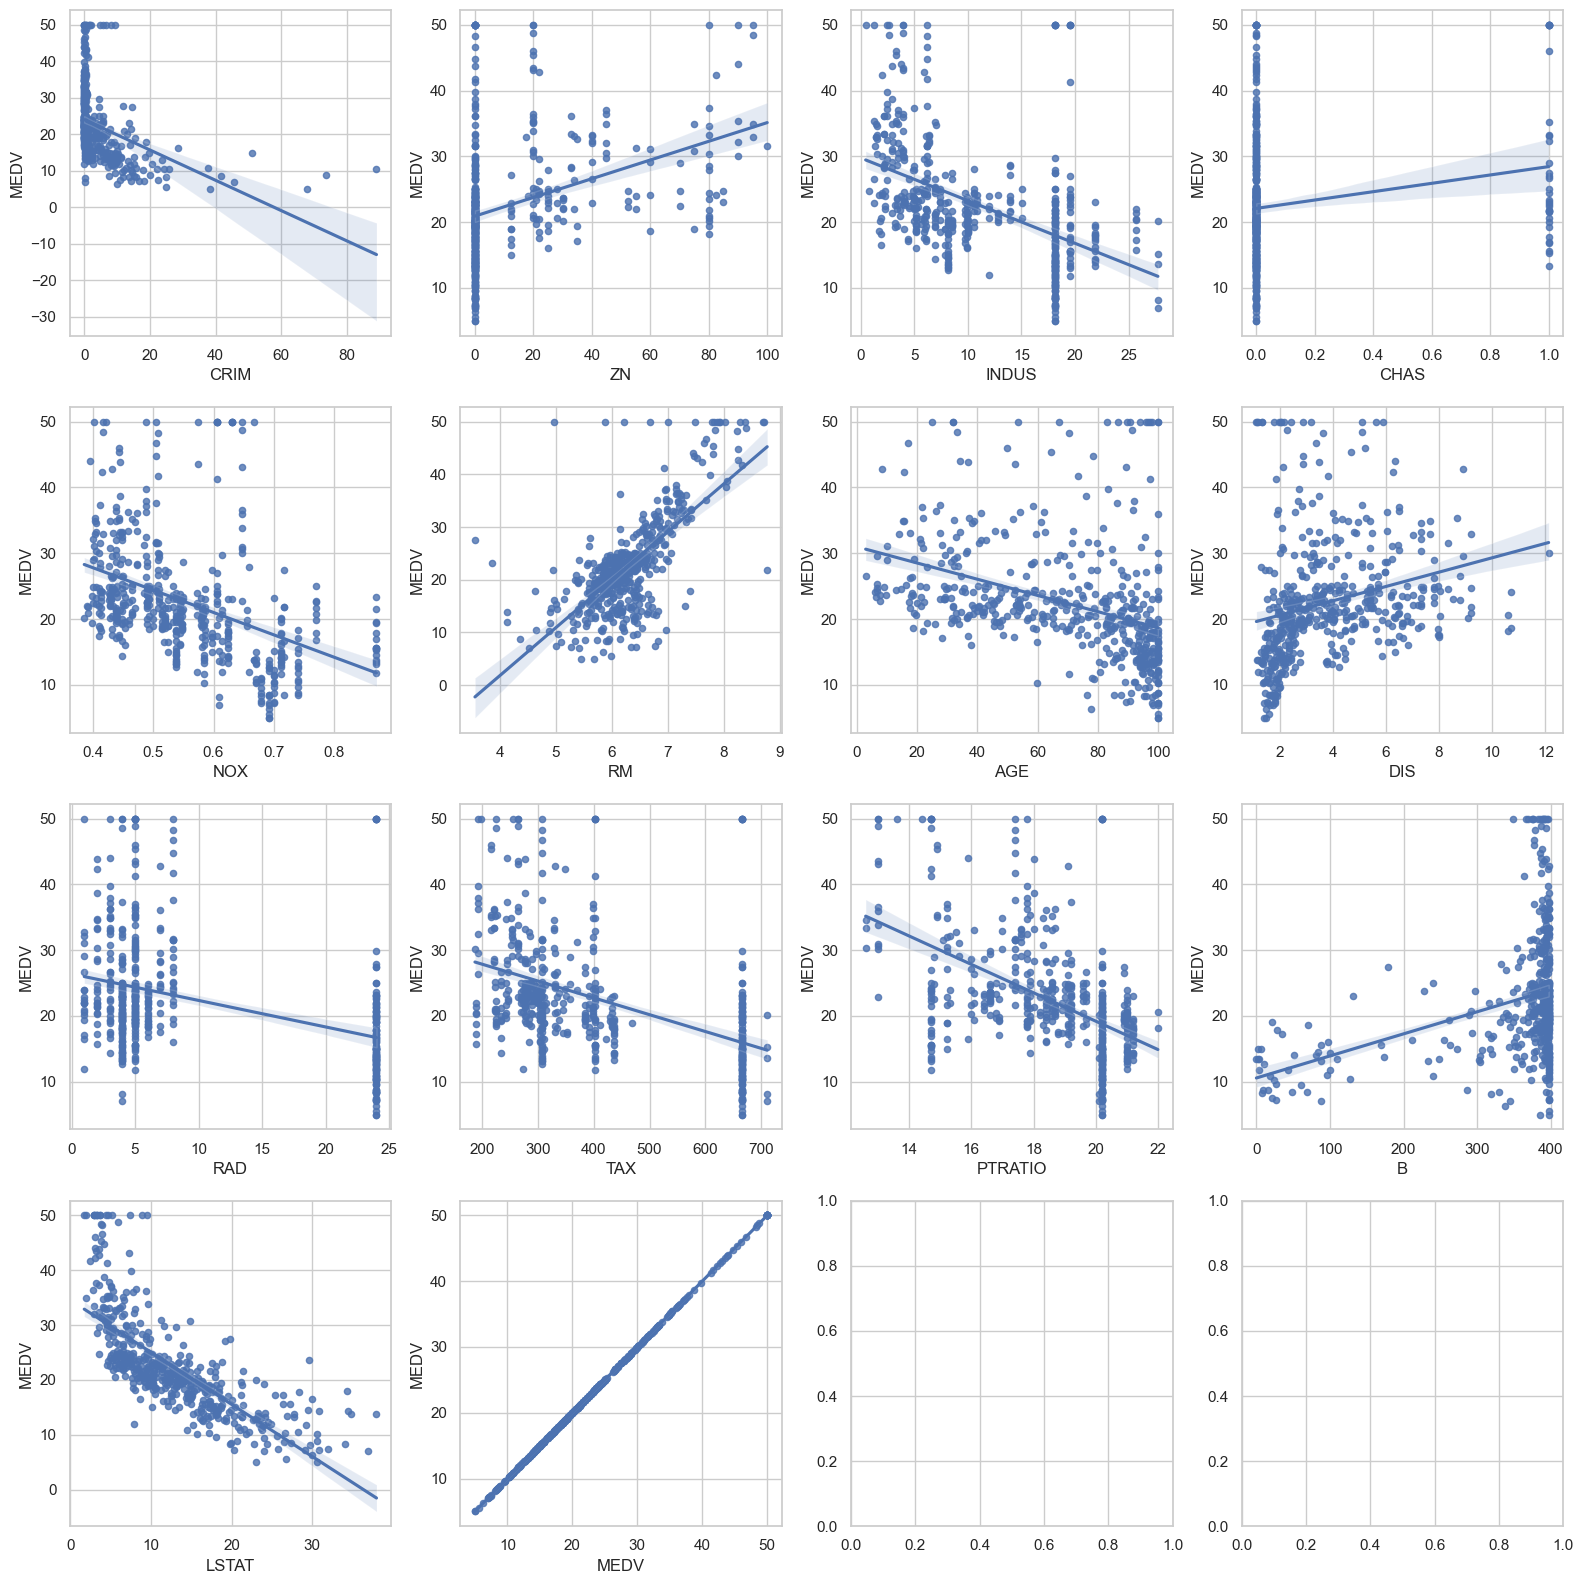

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

fig, axes = plt.subplots(4, 4, figsize=(16, 16))

for i, column in enumerate(boston_df.columns):
    row, col = divmod(i, 4)
    sns.regplot(x=column, y="MEDV", data=boston_df, ax=axes[row, col], scatter_kws={'s': 20})
    
plt.tight_layout()
plt.show()

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [14]:
# Your response here

#The plots tell us what criteria influence the medium value.

#In a way, yes. There are a lot of variables that may influence the price, but in a low percentage compared others.

#I would say LSTAT and Tm have a higher influence.


### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

/var/folders/n7/qn8s75510p5chs7mw2tvcgy80000gp/T/ipykernel_1455/128675545.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


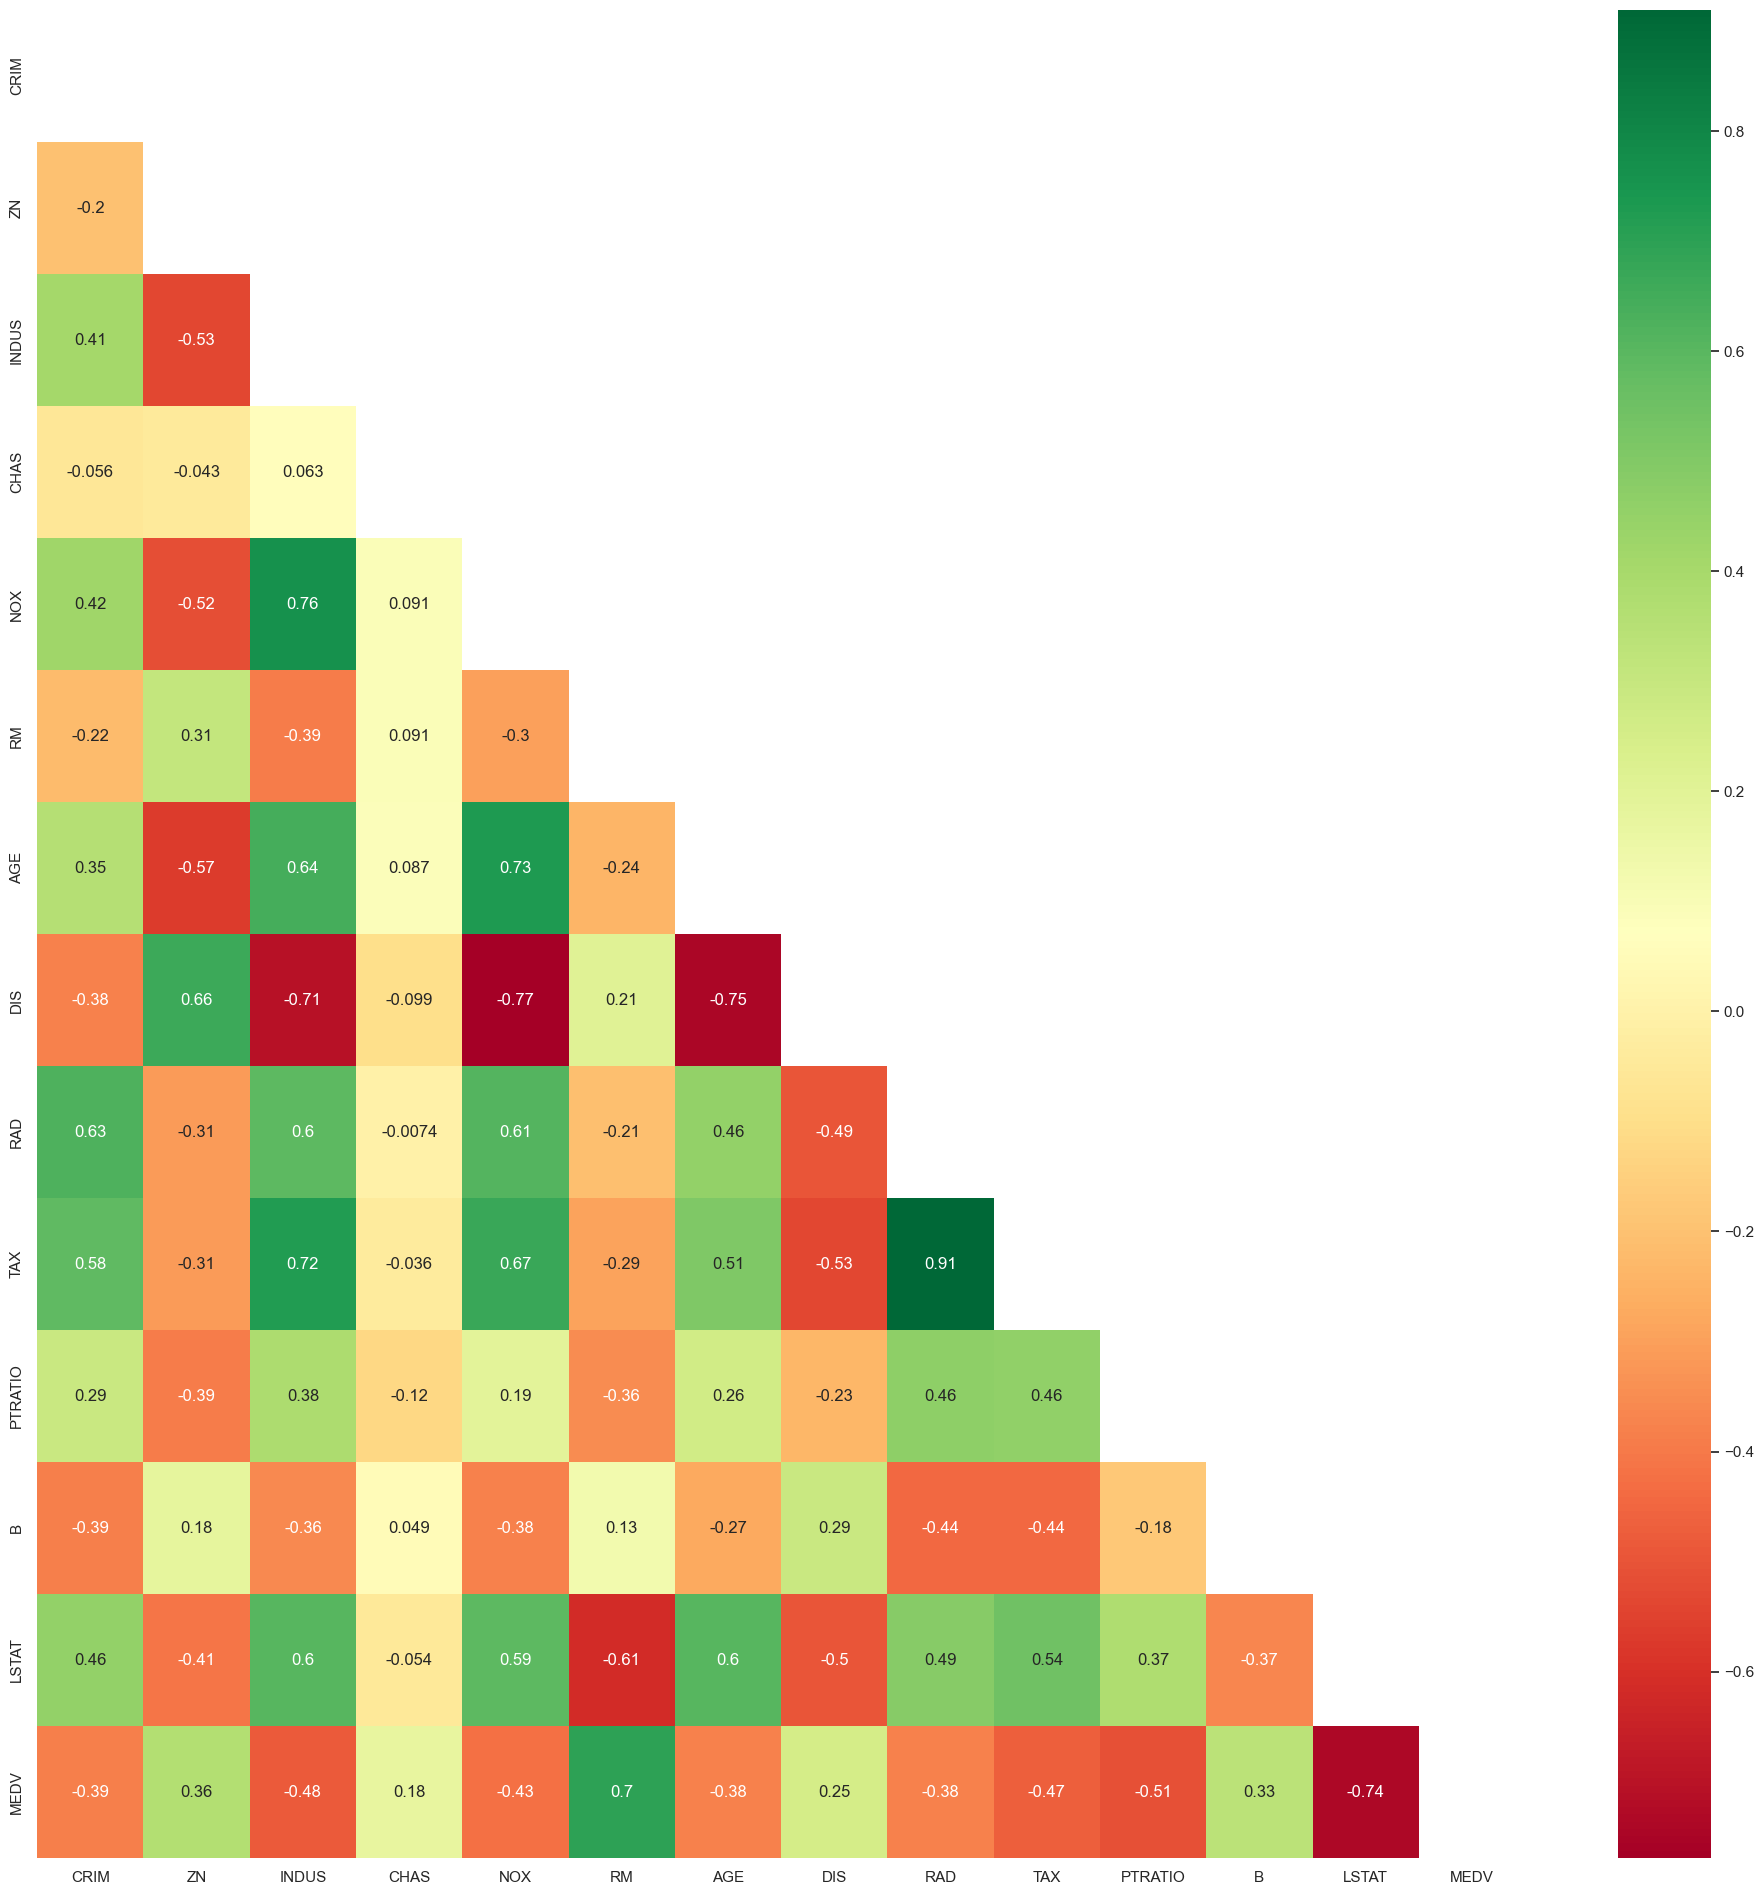

In [15]:
# Your response here

correlation_matrix = boston_df.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

fig = plt.figure(figsize= (24, 24))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='RdYlGn')
fig.show()


In [16]:
#TAX and RAD have a high correlation. Makes sense because houses close to the highway may have a greater tax rate.
#For our model to predict properly, we should drop one of them.

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [17]:
# Your code here

target.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [18]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    r2score = r2_score(y_true, y_predict)
    return r2score

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [19]:
# Your code here

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=1)


----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [20]:
# Five separate RFR here with the given max depths

from sklearn.ensemble import RandomForestRegressor

max_depth_values = [2, 4, 6, 8, 10]

r2scores_perform = []

for max_depth in max_depth_values:
    forest = RandomForestRegressor(n_estimators=10, max_depth=max_depth, random_state=1)
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)
    
    r2scores_perform.append(performance_metric(y_test, y_pred))

In [21]:
r2scores_perform

[0.801620669989864,
 0.8762679428564546,
 0.888785917129582,
 0.8860759757179187,
 0.8872944741284824]

Now, plot the score for each tree on the training set and on the testing set.

In [22]:
max_depth_values = [2, 4, 6, 8, 10]

train_scores = []
test_scores = []

for max_depth in max_depth_values:
    forest = RandomForestRegressor(n_estimators=10, max_depth=max_depth, random_state=1)
    forest.fit(X_train, y_train)

    y_train_pred = forest.predict(X_train)
    
    y_test_pred = forest.predict(X_test)

    train_scores.append(r2_score(y_train, y_train_pred))
    
    test_scores.append(r2_score(y_test, y_test_pred))
    
    

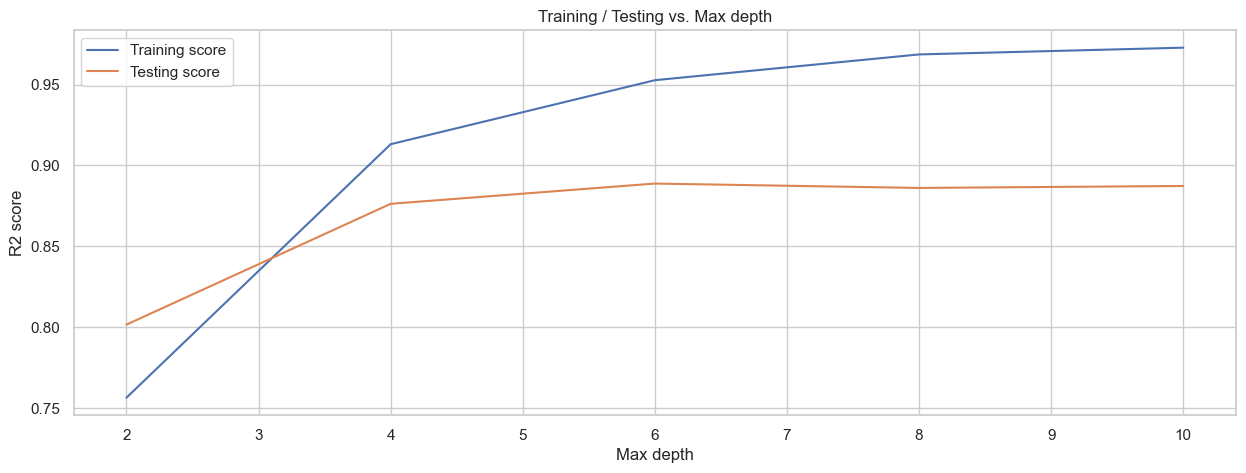

In [23]:
# Produce a plot with the score for the testing and training for the different max depths

plt.figure(figsize=(15, 5))
plt.plot(max_depth_values, train_scores, label="Training score")
plt.plot(max_depth_values, test_scores, label="Testing score")
plt.title("Training / Testing vs. Max depth")
plt.xlabel("Max depth")
plt.ylabel("R2 score")
plt.legend()
plt.show()


What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [24]:
# Your response here

#With a higher depth our model performs better for training and testing. 
#Also, we have a bigger gap between the training and testing.
#Also, we have and increasing gap between training and testing as we change the values for max_depth. This may 
# indicate that our model #is overfitting for the training set and may not generalise very well.

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

In [25]:
# Your response here

#For a depth of 1 i would say a high bias. High error on training and test data.
#For a depth of 10 i would say high variance. The model performs better for training, but the performance on test tends to decrease. 

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [28]:
# Your response here

#The best score that i got was for a depth of 6. I got above 95 for training and above 88 for test.

forest_final = RandomForestRegressor(n_estimators=10, max_depth=6, random_state=1)
forest_final.fit(X_train, y_train)
y_pred = forest_final.predict(X_test)
    
r2_final = performance_metric(y_test, y_pred)

r2_final

#A score of 88 means that our model can predict 88% of the variability in the dependent variable, in this case the MEDV

0.888785917129582

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [29]:
# Your response here

#1 - For this kind of market, we should work with data not older then 2/3 years. If we have a 10-15% increase of prices (taking Portugal's example), 
#after 2 years the data is noise.

#2 - I would say, if we are talking about flat unites for example, then yes. If we try to predict house prices for a "house", then 
#other facts like construction type, house materials and so one need to be take on consideration. 

#3 - Needs more data points. It can work as a tool to have a budget idea, not to set a price for someone to seel a house.

#4 - We need other features for a rural area and drop some features that we have. 